# 1 读取数据

In [1]:
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#利用pands读取数据到表格中
house_df = pd.read_excel('D:/DataSet/ershou2894/house.xlsx')

In [3]:
#查看数据的开头
house_df.head()

,houseId,houseTitle,houseTotalMoney,houseSinglePrice,houseDownPayment,houseGardenName,houseLocation,houseNumber,houseType,houseFloor,...,houseLastTrade,houseUsage,houseAgeLimit,housePrivilegeProperty,housePledge,houseRecord,houseImg,houseUrl,houseRefererUrl,houseCrawlTime
0,1,春禧商务酒店 中楼层 采光好,118万,23629元/平米,36万,春禧商务酒店,锦江\t盐市口\t一环内,106102444217,1室0厅1厨1卫,中楼层(共14层),...,2015-03-28,普通住宅,满两年,非共有,无抵押,已上传房本照片,NaN,https://cd.lianjia.com/ershoufang/106102444217...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
1,2,时代水岸康城 有装修 有家具家电 可拎包入住,88万,11734元/平米,27万,时代水岸康城,郫都\t红光,106101454157,3室2厅1厨1卫,低楼层(共25层),...,暂无数据,普通住宅,暂无数据,非共有,有抵押10万元暂不清楚业主自还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101454157...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
2,3,精装套二，高楼层，采光好，视野无遮挡。,128万,15473元/平米,39万,金辉枫尚,武侯\t武侯立交\t二至三环,106102939993,2室1厅1厨1卫,高楼层(共18层),...,2014-09-03,普通住宅,满两年,共有,有抵押1万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102939993...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
3,4,纯中庭精装N户型，，朝东采光好,303万,34277元/平米,91万,中海兰庭,高新\t大源\t绕城高速至第二绕城高速,106102254366,4室1厅1厨2卫,低楼层(共32层),...,2015-05-06,普通住宅,满两年,共有,有抵押50万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102254366...,https://cd.lianjia.com/ershoufang/pg22/,2019-07-17 10:56:40
4,5,上置小套三 看房便利 随时咨询,86万,11945元/平米,26万,上置雅宾利,郫都\t红光\t绕城高速至第二绕城高速,106101689983,3室1厅1厨1卫,中楼层(共23层),...,暂无数据,普通住宅,暂无数据,共有,有抵押26万元农行高新支行客户偿还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101689983...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40


# 2 数据预处理

## 2.1 缺失值

In [4]:
#检查是否存在缺失值   方法1

#打印出表格中每一列的信息
house_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   houseId                 2993 non-null   int64 
 1   houseTitle              2993 non-null   object
 2   houseTotalMoney         2993 non-null   object
 3   houseSinglePrice        2993 non-null   object
 4   houseDownPayment        2993 non-null   object
 5   houseGardenName         2993 non-null   object
 6   houseLocation           2993 non-null   object
 7   houseNumber             2993 non-null   int64 
 8   houseType               2993 non-null   object
 9   houseFloor              2993 non-null   object
 10  houseBuildingArea       2993 non-null   object
 11  houseStructure          2993 non-null   object
 12  houseInnerArea          2993 non-null   object
 13  houseBuildingType       2993 non-null   object
 14  houseOrientation        2993 non-null   object
 15  hous

In [5]:
#检查是否存在缺失值  方法2

house_df.isnull()

,houseId,houseTitle,houseTotalMoney,houseSinglePrice,houseDownPayment,houseGardenName,houseLocation,houseNumber,houseType,houseFloor,...,houseLastTrade,houseUsage,houseAgeLimit,housePrivilegeProperty,housePledge,houseRecord,houseImg,houseUrl,houseRefererUrl,houseCrawlTime
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
(house_df.isnull()).sum()

houseId                     0
houseTitle                  0
houseTotalMoney             0
houseSinglePrice            0
houseDownPayment            0
houseGardenName             0
houseLocation               0
houseNumber                 0
houseType                   0
houseFloor                  0
houseBuildingArea           0
houseStructure              0
houseInnerArea              0
houseBuildingType           0
houseOrientation            0
houseBuildingStructure      0
houseDecoration             0
houseElevatorRatio          8
houseElevator               8
housePrivilege              8
houseListDate               0
houseTradeProperty          0
houseLastTrade              0
houseUsage                  0
houseAgeLimit               0
housePrivilegeProperty      0
housePledge                 0
houseRecord                 0
houseImg                  103
houseUrl                    0
houseRefererUrl             0
houseCrawlTime              0
dtype: int64

In [7]:
#去掉缺失值
house_df.dropna(inplace=True)

In [8]:
#检查缺失值是否已经过滤
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 1 to 2992
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   houseId                 2886 non-null   int64 
 1   houseTitle              2886 non-null   object
 2   houseTotalMoney         2886 non-null   object
 3   houseSinglePrice        2886 non-null   object
 4   houseDownPayment        2886 non-null   object
 5   houseGardenName         2886 non-null   object
 6   houseLocation           2886 non-null   object
 7   houseNumber             2886 non-null   int64 
 8   houseType               2886 non-null   object
 9   houseFloor              2886 non-null   object
 10  houseBuildingArea       2886 non-null   object
 11  houseStructure          2886 non-null   object
 12  houseInnerArea          2886 non-null   object
 13  houseBuildingType       2886 non-null   object
 14  houseOrientation        2886 non-null   object
 15  hous

In [9]:
(house_df.isnull()).sum()

houseId                   0
houseTitle                0
houseTotalMoney           0
houseSinglePrice          0
houseDownPayment          0
houseGardenName           0
houseLocation             0
houseNumber               0
houseType                 0
houseFloor                0
houseBuildingArea         0
houseStructure            0
houseInnerArea            0
houseBuildingType         0
houseOrientation          0
houseBuildingStructure    0
houseDecoration           0
houseElevatorRatio        0
houseElevator             0
housePrivilege            0
houseListDate             0
houseTradeProperty        0
houseLastTrade            0
houseUsage                0
houseAgeLimit             0
housePrivilegeProperty    0
housePledge               0
houseRecord               0
houseImg                  0
houseUrl                  0
houseRefererUrl           0
houseCrawlTime            0
dtype: int64

In [10]:
house_df.head()

,houseId,houseTitle,houseTotalMoney,houseSinglePrice,houseDownPayment,houseGardenName,houseLocation,houseNumber,houseType,houseFloor,...,houseLastTrade,houseUsage,houseAgeLimit,housePrivilegeProperty,housePledge,houseRecord,houseImg,houseUrl,houseRefererUrl,houseCrawlTime
1,2,时代水岸康城 有装修 有家具家电 可拎包入住,88万,11734元/平米,27万,时代水岸康城,郫都\t红光,106101454157,3室2厅1厨1卫,低楼层(共25层),...,暂无数据,普通住宅,暂无数据,非共有,有抵押10万元暂不清楚业主自还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101454157...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
2,3,精装套二，高楼层，采光好，视野无遮挡。,128万,15473元/平米,39万,金辉枫尚,武侯\t武侯立交\t二至三环,106102939993,2室1厅1厨1卫,高楼层(共18层),...,2014-09-03,普通住宅,满两年,共有,有抵押1万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102939993...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
3,4,纯中庭精装N户型，，朝东采光好,303万,34277元/平米,91万,中海兰庭,高新\t大源\t绕城高速至第二绕城高速,106102254366,4室1厅1厨2卫,低楼层(共32层),...,2015-05-06,普通住宅,满两年,共有,有抵押50万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102254366...,https://cd.lianjia.com/ershoufang/pg22/,2019-07-17 10:56:40
4,5,上置小套三 看房便利 随时咨询,86万,11945元/平米,26万,上置雅宾利,郫都\t红光\t绕城高速至第二绕城高速,106101689983,3室1厅1厨1卫,中楼层(共23层),...,暂无数据,普通住宅,暂无数据,共有,有抵押26万元农行高新支行客户偿还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101689983...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40
5,6,青羊区信托单位房标准三居室小区可停车,225万,16065元/平米,68万,文庙公寓,青羊\t人民公园\t一环内,106102933675,3室2厅1厨2卫,低楼层(共7层),...,暂无数据,普通住宅,暂无数据,非共有,无抵押,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102933675...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40


## 2.2 重复值

In [11]:
#重复值的判断
house_df.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
2988    False
2989    False
2990    False
2991    False
2992    False
Length: 2886, dtype: bool

In [12]:
#详细计算存在重复值的个数
(house_df.duplicated()).sum()

0

In [13]:
#如果存在重复值，如何删除重复值？
#house_df.drop_duplicates()

In [14]:
house_df.head()

,houseId,houseTitle,houseTotalMoney,houseSinglePrice,houseDownPayment,houseGardenName,houseLocation,houseNumber,houseType,houseFloor,...,houseLastTrade,houseUsage,houseAgeLimit,housePrivilegeProperty,housePledge,houseRecord,houseImg,houseUrl,houseRefererUrl,houseCrawlTime
1,2,时代水岸康城 有装修 有家具家电 可拎包入住,88万,11734元/平米,27万,时代水岸康城,郫都\t红光,106101454157,3室2厅1厨1卫,低楼层(共25层),...,暂无数据,普通住宅,暂无数据,非共有,有抵押10万元暂不清楚业主自还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101454157...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
2,3,精装套二，高楼层，采光好，视野无遮挡。,128万,15473元/平米,39万,金辉枫尚,武侯\t武侯立交\t二至三环,106102939993,2室1厅1厨1卫,高楼层(共18层),...,2014-09-03,普通住宅,满两年,共有,有抵押1万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102939993...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
3,4,纯中庭精装N户型，，朝东采光好,303万,34277元/平米,91万,中海兰庭,高新\t大源\t绕城高速至第二绕城高速,106102254366,4室1厅1厨2卫,低楼层(共32层),...,2015-05-06,普通住宅,满两年,共有,有抵押50万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102254366...,https://cd.lianjia.com/ershoufang/pg22/,2019-07-17 10:56:40
4,5,上置小套三 看房便利 随时咨询,86万,11945元/平米,26万,上置雅宾利,郫都\t红光\t绕城高速至第二绕城高速,106101689983,3室1厅1厨1卫,中楼层(共23层),...,暂无数据,普通住宅,暂无数据,共有,有抵押26万元农行高新支行客户偿还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101689983...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40
5,6,青羊区信托单位房标准三居室小区可停车,225万,16065元/平米,68万,文庙公寓,青羊\t人民公园\t一环内,106102933675,3室2厅1厨2卫,低楼层(共7层),...,暂无数据,普通住宅,暂无数据,非共有,无抵押,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102933675...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40


## 2.3 数据类型转换

将数据项中的单位去除，然后转换成我们需要的数字类型。

In [15]:
#为了防止数据在类型转换的过程中出错，我们可以预先判断一下该列的数据是否都包含相同的要去除的字段
house_df.houseTotalMoney.str.contains('万')

1       True
2       True
3       True
4       True
5       True
        ... 
2988    True
2989    True
2990    True
2991    True
2992    True
Name: houseTotalMoney, Length: 2886, dtype: bool

In [16]:
(~house_df.houseTotalMoney.str.contains('万')).sum()

0

In [17]:
#类型转换
house_df['houseTotalMoney'] = house_df['houseTotalMoney'].apply(lambda x: float(x.replace('万', '')))
house_df['houseSinglePrice'] = house_df['houseSinglePrice'].apply(lambda x: float(x.replace('元/平米', '')))
house_df['houseDownPayment'] = house_df['houseDownPayment'].apply(lambda x: float(x.replace('万', '')))
house_df['houseBuildingArea'] = house_df['houseBuildingArea'].apply(lambda x: float(x.replace('㎡', '')))
house_df['totalFloor'] = house_df['houseFloor'].apply(lambda x:re.search('\d+', x).group())


In [18]:
#为了方便按照区域进行分区统计，我们将houseLocation字段中的区域单独提取出来。
house_df['Region'] = house_df['houseLocation'].apply(lambda x: x.split("\t")[0])

In [19]:
house_df.head()

,houseId,houseTitle,houseTotalMoney,houseSinglePrice,houseDownPayment,houseGardenName,houseLocation,houseNumber,houseType,houseFloor,...,houseAgeLimit,housePrivilegeProperty,housePledge,houseRecord,houseImg,houseUrl,houseRefererUrl,houseCrawlTime,totalFloor,Region
1,2,时代水岸康城 有装修 有家具家电 可拎包入住,88.0,11734.0,27.0,时代水岸康城,郫都\t红光,106101454157,3室2厅1厨1卫,低楼层(共25层),...,暂无数据,非共有,有抵押10万元暂不清楚业主自还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101454157...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40,25,郫都
2,3,精装套二，高楼层，采光好，视野无遮挡。,128.0,15473.0,39.0,金辉枫尚,武侯\t武侯立交\t二至三环,106102939993,2室1厅1厨1卫,高楼层(共18层),...,满两年,共有,有抵押1万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102939993...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40,18,武侯
3,4,纯中庭精装N户型，，朝东采光好,303.0,34277.0,91.0,中海兰庭,高新\t大源\t绕城高速至第二绕城高速,106102254366,4室1厅1厨2卫,低楼层(共32层),...,满两年,共有,有抵押50万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102254366...,https://cd.lianjia.com/ershoufang/pg22/,2019-07-17 10:56:40,32,高新
4,5,上置小套三 看房便利 随时咨询,86.0,11945.0,26.0,上置雅宾利,郫都\t红光\t绕城高速至第二绕城高速,106101689983,3室1厅1厨1卫,中楼层(共23层),...,暂无数据,共有,有抵押26万元农行高新支行客户偿还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101689983...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40,23,郫都
5,6,青羊区信托单位房标准三居室小区可停车,225.0,16065.0,68.0,文庙公寓,青羊\t人民公园\t一环内,106102933675,3室2厅1厨2卫,低楼层(共7层),...,暂无数据,非共有,无抵押,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102933675...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40,7,青羊


## 2.4 异常值

In [20]:
#查看最小值
house_df.houseTotalMoney.min()
#查看最大值
house_df.houseTotalMoney.max()
# 删除异常值   假设50以下的为异常值
house_df = house_df[house_df.houseTotalMoney > 50]

In [21]:
house_df.describe()

,houseId,houseTotalMoney,houseSinglePrice,houseDownPayment,houseNumber,houseBuildingArea
count,2856.000000,2856.000000,2856.000000,2856.000000,2.856000e+03,2856.000000
mean,1491.539566,144.706898,15753.960084,43.781162,1.061025e+11,90.807143
std,865.980533,80.122485,5164.314793,23.998659,4.941441e+05,29.067047
min,2.000000,51.000000,5439.000000,16.000000,1.061000e+11,28.510000
25%,734.750000,96.000000,12042.750000,29.000000,1.061023e+11,73.707500
50%,1493.500000,125.000000,14788.500000,38.000000,1.061026e+11,86.310000
75%,2236.250000,168.000000,18353.000000,51.000000,1.061028e+11,104.000000
max,2993.000000,1100.000000,44846.000000,330.000000,1.061030e+11,380.000000


# 3 数据分析与可视化

## 3.1 二手房的区域分析

分析不同区域的二手房单价、数量以及总价的对比

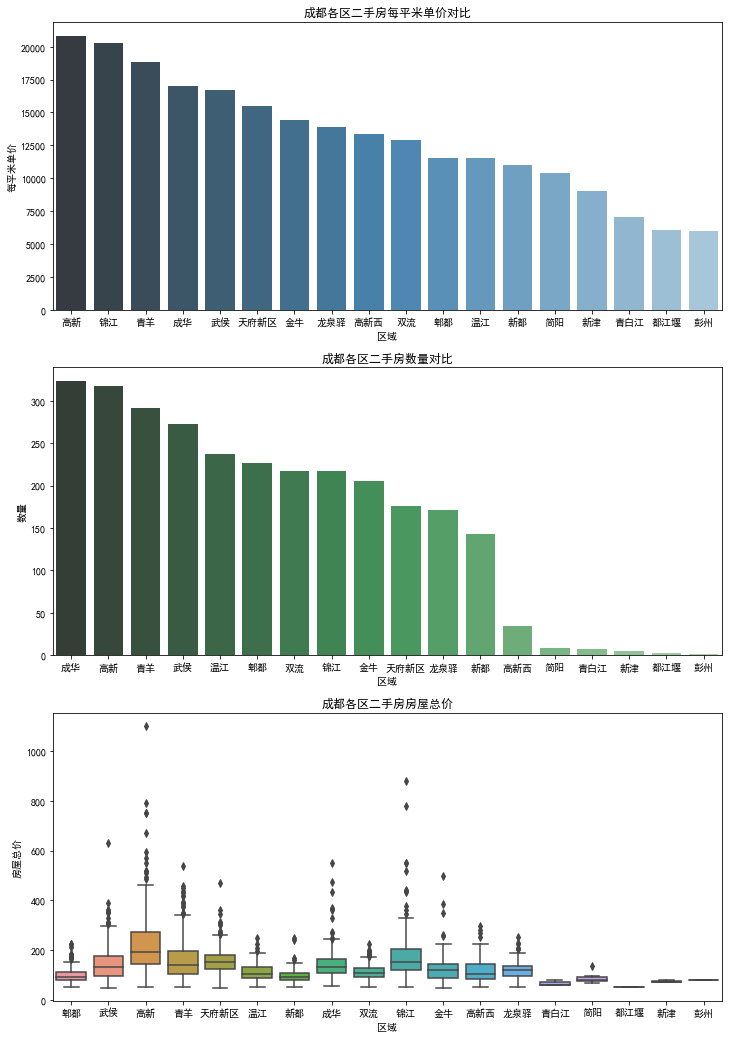

In [22]:
df_house_count = house_df.groupby('Region')['houseId'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_count.rename(columns = {'houseId':'Count'},inplace='True')
df_house_mean = house_df.groupby('Region')['houseSinglePrice'].mean().sort_values(ascending=False).to_frame().reset_index()
f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(12, 18))

plt.rcParams['font.sans-serif']=['SimHei']
#sns.set(font='SimHei')

sns.barplot(x='Region', y='houseSinglePrice', palette='Blues_d', data=df_house_mean, ax=ax1)
ax1.set_title('成都各区二手房每平米单价对比')
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='Region', y='Count', palette='Greens_d', data=df_house_count, ax=ax2)
ax2.set_title('成都各区二手房数量对比')
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region', y='houseTotalMoney', data=house_df, ax=ax3)
ax3.set_title('成都各区二手房房屋总价')
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()


## 3.2 房屋面积分析

房屋面积的数据分布以及房屋面积与价格的关系

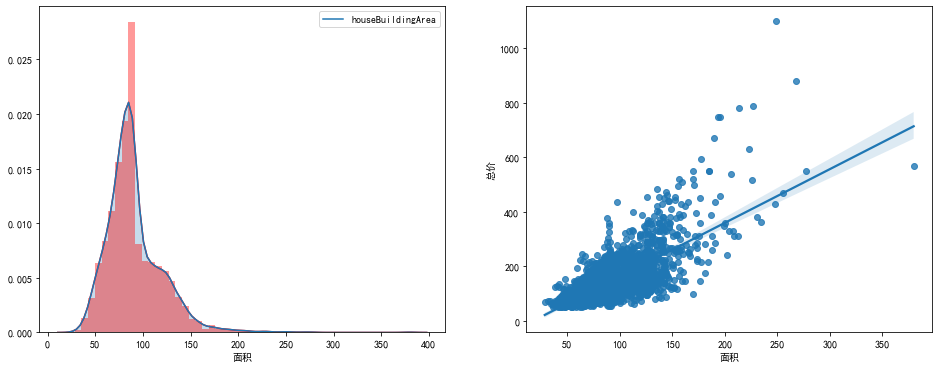

In [23]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 6))
# 房屋面积
sns.distplot(house_df['houseBuildingArea'], ax=ax1, color='r')
sns.kdeplot(house_df['houseBuildingArea'], shade=True, ax=ax1)
ax1.set_xlabel('面积')

# 房屋面积和价格的关系
sns.regplot(x='houseBuildingArea', y='houseTotalMoney', data=house_df, ax=ax2)
ax2.set_xlabel('面积')
ax2.set_ylabel('总价')

plt.show()

## 3.3 房屋户型的数量分析

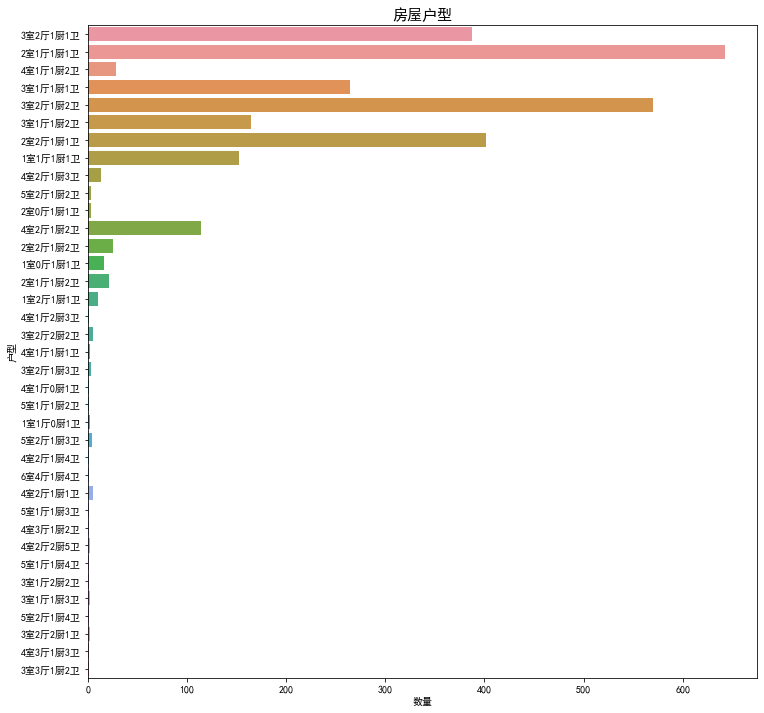

In [24]:
f, ax1 = plt.subplots(figsize=(12,12))
sns.countplot(y='houseType', data=house_df, ax=ax1)
ax1.set_title('房屋户型', fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')

plt.show()

## 3.4 房屋装潢与房屋总价的关系

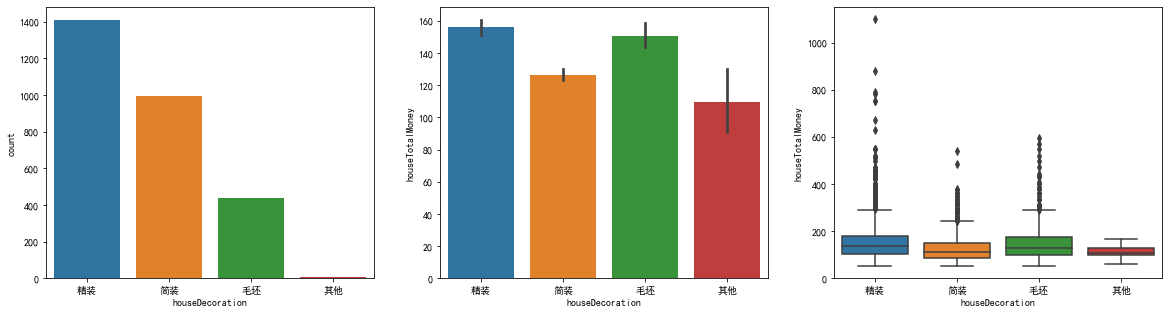

In [25]:
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(house_df['houseDecoration'], ax=ax1)
sns.barplot(x='houseDecoration', y='houseTotalMoney', data=house_df, ax=ax2)
sns.boxplot(x='houseDecoration', y='houseTotalMoney', data=house_df, ax=ax3)

plt.show()

## 3.5 有无电梯的房屋数量以及房价分析

In [26]:
#词频统计
house_df['houseElevator'].value_counts()

有       2262
无        419
暂无数据     175
Name: houseElevator, dtype: int64

In [27]:
#对暂无数据的数据进行过滤
elevator_df = house_df[house_df['houseElevator'] != '暂无数据']
elevator_df['houseElevator'].value_counts()

有    2262
无     419
Name: houseElevator, dtype: int64

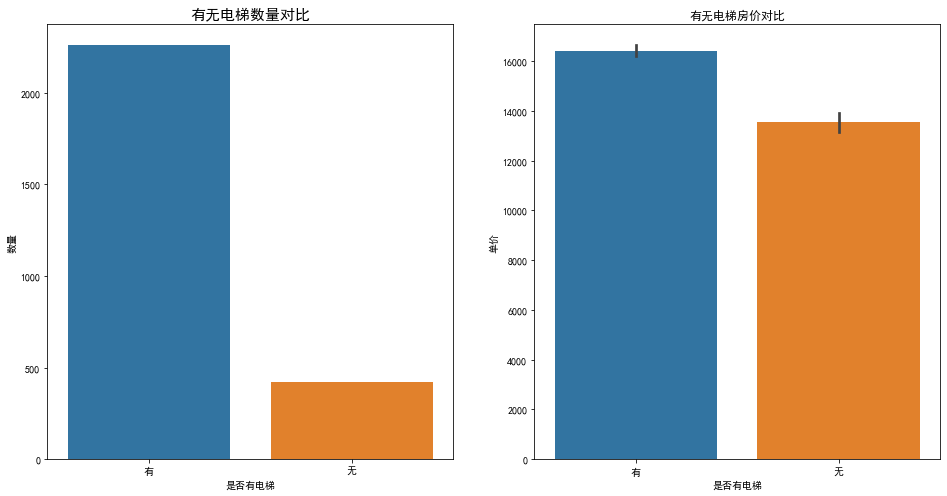

In [28]:
#电梯绘图
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot(elevator_df['houseElevator'], ax=ax1)
ax1.set_title('有无电梯数量对比', fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')

sns.barplot(x='houseElevator', y='houseSinglePrice', data=elevator_df, ax=ax2)
ax2.set_title('有无电梯房价对比')
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('单价')

plt.show()

## 3.6 房屋所在楼层的数量分析

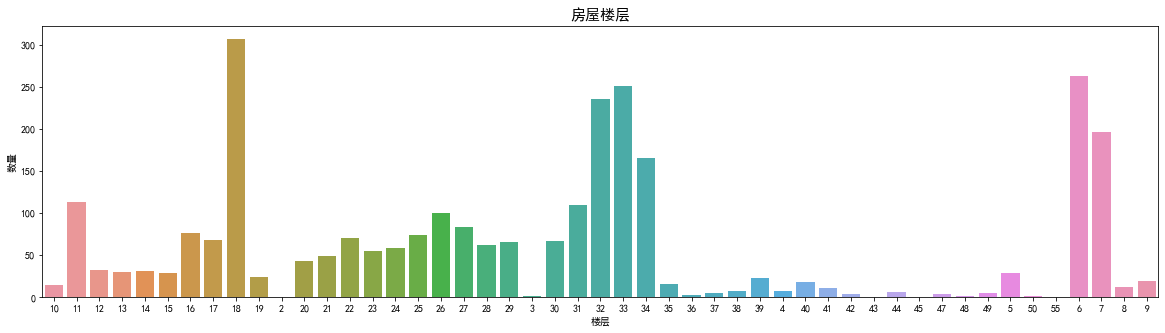

In [29]:
f, ax1 = plt.subplots(figsize=(20,5))
sns.countplot(x='totalFloor', data=house_df, ax=ax1)
ax1.set_title('房屋楼层',fontsize=15)
ax1.set_xlabel('楼层')
ax1.set_ylabel('数量')

plt.show()